In [1]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import sklearn
import statistics
import scipy.stats
import matplotlib
matplotlib.rcParams.update({
    'font.size':20,
    'font.family':'DejaVu Sans', 
    'xtick.labelsize':20, 
    'ytick.labelsize':20, 
    'axes.labelsize':30, 
    'figure.figsize':(12, 8)
    })
import sklearn, sklearn.preprocessing, sklearn.decomposition
import matplotlib.patches as mpatches
from sklearn.ensemble import IsolationForest


In [2]:
wkdir= "/home/jing/Phd_project/project_UCD_blca/blca_publication_OUTPUT/blca_publication_OUTPUT_LINCS/"
data_year = "2020"
cell_name = "BC3C"

data_dir = os.path.join(wkdir,"00_outputs_" + data_year + "_" + cell_name)

In [5]:
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm = pd.read_excel(data_file, index_col = 0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

exp_id_list = Data_norm.index.to_list()
print("Experiments in LINCS data for " + cell_name + " cells:", len(exp_id_list), exp_id_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.543203,0.494266,-0.011923,-0.225931,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,-0.565096,-0.088634,0.122977,-0.047931,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,0.226104,-0.228034,-0.121023,-0.075331,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.608596,-0.228835,0.072777,0.082970,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.318397,0.122265,-0.134323,-0.088931,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,-1.598475,-0.552750,0.515151,0.120800,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-1.650575,0.203600,-0.003250,-0.064800,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.127625,0.031600,0.103250,-0.249600,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.054676,-0.596050,0.084600,0.444700,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

### Sig info

In [3]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_BC3C_24H:A03,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A04,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A05,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:A06,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:A06,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_BC3C_24H:J13,BC3C,ASG002,24 h,ASG002_BC3C_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P20,1,trt_cp,BAY-61-3606,,0,3.33 uM,3.33
MOAR012_BC3C_24H:P21,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P21,1,trt_cp,BAY-61-3606,,0,1.11 uM,1.11
MOAR012_BC3C_24H:P22,BC3C,MOAR012,24 h,MOAR012_BC3C_24H_X1_B36:P22,1,trt_cp,ethaverine,,0,10 uM,10.00


### Read DPDs

In [24]:
# load STV data frame
STVs = pd.read_excel(os.path.join(data_dir, "ALL_DATA_2020_Jing.xlsx"), sheet_name = "STV", index_col = 0)

states = STVs.columns.to_list()
print("States:", states)

STV_df = pd.DataFrame(
    np.zeros((len(genes_list), len(states))), 
    index = genes_list, 
    columns = states)

STV_df.loc[STVs.index] = STVs

display(STV_df)

DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), len(states))),
    index = exp_id_list,
    columns = states,
)

States: ['blca_invasiveness', 'blca_oncogenesis', 'blca_survival']


,blca_invasiveness,blca_oncogenesis,blca_survival
AARS,0.016052,0.078487,0.000000
ABCB6,0.001612,0.027125,-2.890931
ABCC5,-0.016742,0.002121,0.000000
ABCF1,-0.038990,-0.028959,-0.496186
ABCF3,0.023288,0.036671,0.000000
...,...,...,...
ZNF395,0.000000,0.000000,0.000000
ZNF451,0.011450,0.013403,0.000000
ZNF586,0.000000,0.000000,0.119103
ZNF589,0.000000,0.000000,0.000000


In [39]:
DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), len(states))),
    index = exp_id_list,
    columns = states,
)
for exp_id in DPD_df.index:
    DPD_df.loc[exp_id] = np.dot(Data_norm.loc[exp_id], STV_df.loc[:, ])

display(DPD_df)

,blca_invasiveness,blca_oncogenesis,blca_survival
ASG002_BC3C_24H:A03,0.224169,0.302763,-2.655867
ASG002_BC3C_24H:A04,0.150151,-0.135368,-3.584228
ASG002_BC3C_24H:A05,0.167952,-0.014359,-2.363371
ASG002_BC3C_24H:A06,0.328579,-0.094210,-7.807932
ASG002_BC3C_24H:J13,-0.582389,-0.243571,0.562112
...,...,...,...
MOAR012_BC3C_24H:P20,1.639600,-0.777955,2.656299
MOAR012_BC3C_24H:P21,0.843686,-0.200156,0.350116
MOAR012_BC3C_24H:P22,0.530906,0.472079,-3.075259
MOAR012_BC3C_24H:P23,0.684520,-0.052636,-8.261984


In [27]:
#Full info
data_norm_info_df = pd.concat([Data_norm,
                               sig_info_cell_df.loc[Data_norm.index,['pert_drug','targets','dose','dose_float']]],
                               axis=1)                            
display(data_norm_info_df)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10,pert_drug,targets,dose,dose_float
ASG002_BC3C_24H:A03,-0.191254,-0.055246,0.039596,-0.256266,-0.040419,-0.590523,-0.159396,-0.074319,0.457981,0.409608,...,0.285054,-0.775246,0.166031,-0.024873,0.238723,0.284204,DMSO,DMSO_No_target,0 uM,0.00
ASG002_BC3C_24H:A04,-0.265754,-0.317496,0.118696,-0.136665,-0.301569,-0.403023,0.124804,-0.036470,0.311931,0.660457,...,0.141804,0.129054,-0.028819,-0.028773,-0.253627,-0.752646,DMSO,DMSO_No_target,0 uM,0.00
ASG002_BC3C_24H:A05,-0.181954,-0.081597,-0.210304,1.559535,-0.019019,-0.457423,0.071404,0.074080,-0.356119,0.498808,...,-0.133146,0.355054,0.022831,-0.084073,0.283123,-0.894896,DMSO,DMSO_No_target,0 uM,0.00
ASG002_BC3C_24H:A06,0.033446,0.042404,-0.150154,-0.093165,0.053180,-0.053823,0.087704,0.167681,-0.601569,0.383308,...,-0.570996,2.847754,-0.211670,-0.067273,0.081723,0.338704,DMSO,DMSO_No_target,0 uM,0.00
ASG002_BC3C_24H:J13,0.204446,0.180704,0.089096,-0.054666,0.053381,0.044877,-0.277396,-0.157419,0.535681,-3.933493,...,-0.067996,-0.515847,-0.005069,0.067527,0.002223,0.204904,DMSO,DMSO_No_target,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_BC3C_24H:P20,0.647151,0.211700,-0.979200,0.597350,-0.375751,0.388300,0.394524,0.120151,-0.166775,-1.129125,...,0.082675,0.529700,0.383225,-0.207225,2.268450,-1.248500,BAY-61-3606,,3.33 uM,3.33
MOAR012_BC3C_24H:P21,0.171800,0.046300,-0.145550,-0.295150,0.030849,0.420951,0.222075,0.179800,0.274724,-0.423975,...,-0.037675,0.076499,0.201825,0.416875,0.287450,-0.971700,BAY-61-3606,,1.11 uM,1.11
MOAR012_BC3C_24H:P22,0.648700,0.058749,-0.031700,0.408249,-0.753950,0.332200,-0.357525,-0.107650,-0.213575,0.074225,...,0.046375,1.486200,0.440325,0.090075,-0.031650,-0.944300,ethaverine,,10 uM,10.00
MOAR012_BC3C_24H:P23,0.090499,-0.469300,-0.611800,0.873550,-0.788450,-0.097199,-0.366575,-0.490600,-0.624675,-0.009275,...,0.431375,-0.921501,0.044926,0.716076,-0.000900,-1.106700,ethaverine,,3.33 uM,3.33


### Targets 

In [ ]:
to_pca_df=data_norm_info_df.loc[data_norm_info_df.targets.str.contains('SRC')]

display(to_pca_df)

In [59]:
target_name = "CDK"

target = "CDK"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))


drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10,pert_drug,targets,dose,dose_float
ASG002_BC3C_24H:I07,1.550446,-0.412196,-0.025804,0.147235,-0.130919,0.462377,-0.003796,0.207281,-0.192119,1.852208,...,0.131254,-0.002946,-0.365519,-0.031673,0.032823,-0.354396,dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...",10 uM,10.00
ASG002_BC3C_24H:I08,0.138246,-0.185996,-0.025654,0.214134,0.086381,0.196076,-0.210296,-1.347619,0.565881,0.592707,...,-0.055996,1.544854,-0.112619,-0.279373,-0.014677,0.410604,dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...",1.11 uM,1.11
ASG002_BC3C_24H:I09,0.013946,0.064754,0.164146,0.672535,-0.654619,-0.182323,-0.428196,-0.140769,-0.525269,0.460608,...,-0.151846,0.367054,0.044281,-0.165373,-0.225977,-0.568746,dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...",0.12 uM,0.12


In [66]:
to_pca_dpds =DPD_df.loc[to_pca_df.index,['blca_invasiveness', 'blca_oncogenesis', 'blca_survival']]
display(to_pca_dpds)

,blca_invasiveness,blca_oncogenesis,blca_survival
ASG002_BC3C_24H:I07,0.989758,0.500969,1.208649
ASG002_BC3C_24H:I08,1.140398,-0.022810,-8.827480
ASG002_BC3C_24H:I09,-0.095191,0.528036,-2.856069


In [67]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(to_pca_dpds.values)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.73505286 0.26494714]


In [70]:
result_pca = pd.DataFrame(new,index=to_pca_dpds.index,columns=['PCA1','PCA2'])
result_pca['pert_drug']=to_pca_df.loc[to_pca_dpds.index,'pert_drug']
result_pca['dose']=to_pca_df.loc[to_pca_dpds.index,'dose']
result_pca

,PCA1,PCA2,pert_drug,dose
ASG002_BC3C_24H:I07,0.845646,1.154089,dasatinib,10 uM
ASG002_BC3C_24H:I08,-2.087575,-0.137362,dasatinib,1.11 uM
ASG002_BC3C_24H:I09,1.241930,-1.016727,dasatinib,0.12 uM


In [7]:
target_name = "CDK"

target = "CDK"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))


drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target CDK: 5 ['JNJ-7706621', 'PHA-793887', 'alvocidib', 'palbociclib', 'roscovitine']


In [8]:
drugs_list = drugs #+ ["OTS-167", "PHA-767491"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
palbociclib,"CDK4, CDK6","0.12 uM, 1.11 uM, 10 uM"
roscovitine,"CDK2, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"


In [43]:

scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(to_pca_dpds.values)
model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

[0.39475684 0.32307624]


In [71]:

# Generate a list of unique drugs
unique_drugs = list(set(result_pca['pert_drug']))
# Define color names
color_names = ['red', 'green', 'purple', 'orange', 'blue','brown',  'cyan', 'magenta', 'yellow', 'black', 'gray', 'olive', 'pink', 'lime', 'gold', 'navy', 'maroon', 'teal', 'coral', 'aqua']
colors = plt.cm.tab20.colors  # You can use other colormap as well
num_colors = len(colors)

In [72]:

# Create a dictionary to map each unique drug to a color
drug_color_map = {drug: color_names[i % len(color_names)] for i, drug in enumerate(unique_drugs)}

# Assign colors to the_colors list based on the drug_color_map
the_colors = [drug_color_map[drug] for drug in result_pca['pert_drug']]

# Define marker sizes based on dose
dose_size_map = {
    '0 uM': 100,
    '0.08 uM': 150,
    '0.12 uM': 250,
    '1.11 uM': 500,
    '3.33 uM': 750,
    '10 uM': 900  # default size for doses not specified
}

# Assign sizes to the marker_sizes list based on the dose_size_map
marker_sizes = [dose_size_map.get(dose, dose_size_map) for dose in result_pca['dose']]

# Define marker shapes
marker_shapes = ['*','s', 'o', 'p', 'd', 'x', ]#, 's', '<', '>', 'v', 'H', '8']
drug_shape_map = {drug: marker_shapes[i % len(marker_shapes)] for i, drug in enumerate(unique_drugs)}

# Assign shapes to the marker_shapes list based on the drug_shape_map
the_shapes = [drug_shape_map[drug] for drug in result_pca['pert_drug']]

# Print the assigned results for verification
for element, color, size, shape in zip(result_pca['pert_drug'], the_colors, marker_sizes, the_shapes):
    print(f"Drug: {element}, Assigned Color: {color}, Size: {size}, Shape: {shape}")

Drug: dasatinib, Assigned Color: red, Size: 900, Shape: *
Drug: dasatinib, Assigned Color: red, Size: 500, Shape: *
Drug: dasatinib, Assigned Color: red, Size: 250, Shape: *


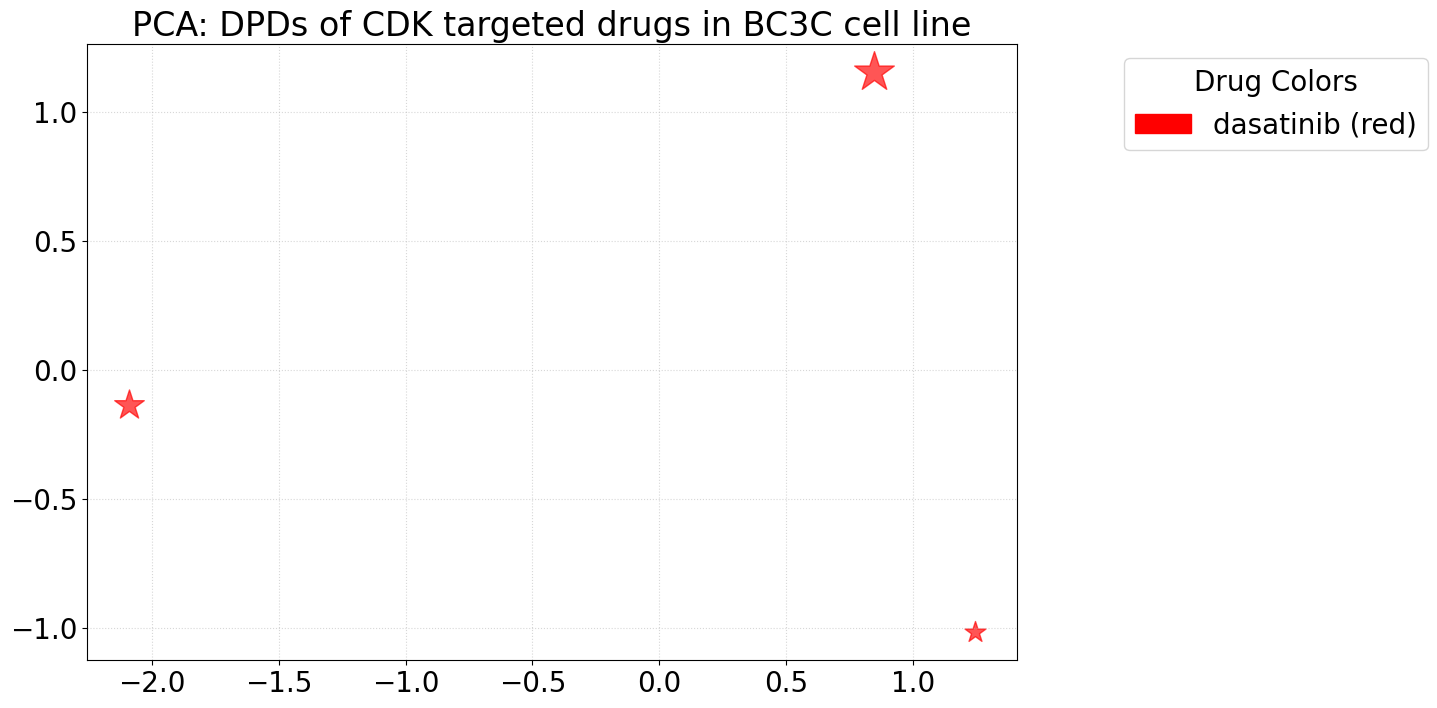

In [73]:
for i in range(len(result_pca)):
    plt.scatter(result_pca.iloc[i]['PCA1'], result_pca.iloc[i]['PCA2'], s=marker_sizes[i], c=the_colors[i], marker=the_shapes[i], alpha=2/3)
# Create legend
legend_elements = [mpatches.Patch(color=drug_color_map[drug], label=f"{drug} ({drug_color_map[drug]})") for drug in unique_drugs]
plt.legend(handles=legend_elements, title="Drug Colors",ncol=2, bbox_to_anchor=(1.1,1))#

plt.grid(alpha=0.5, ls=':')
plt.title(f'PCA: DPDs of {target} targeted drugs in {cell_name} cell line')
plt.show()


In [74]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.1),random_state=41)

model.fit(to_pca_dpds)

print(model.get_params())

{'bootstrap': False, 'contamination': 0.1, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': 41, 'verbose': 0, 'warm_start': False}


In [75]:
result_pca['scores'] = model.decision_function(to_pca_dpds)

result_pca['anomaly_score'] = model.predict(to_pca_dpds)

result_pca[result_pca['anomaly_score']==-1].head()

,PCA1,PCA2,pert_drug,dose,scores,anomaly_score
ASG002_BC3C_24H:I08,-2.087575,-0.137362,dasatinib,1.11 uM,-0.007861,-1


In [1484]:
result_pca['targets']=to_pca['targets']
result_pca.sort_values(['scores'])

,PCA1,PCA2,pert_drug,dose,scores,anomaly_score,targets
MOAR011_CAL29_24H:C02,3.174332,0.165030,oxandrolone,3.33 uM,-0.076434,-1,AR
MOAR010_CAL29_24H:L20,-1.511987,1.430138,testosterone-propionate,3.33 uM,-0.008919,-1,AR
MOAR011_CAL29_24H:C01,0.600922,2.148042,oxandrolone,10 uM,0.013378,1,AR
MOAR008_CAL29_24H:L01,0.885500,-1.421779,flufenamic-acid,10 uM,0.024021,1,"AKR1C3, AR, PTGS1, PTGS2"
MOAR011_CAL29_24H:C10,0.936381,1.315138,testosterone-enanthate,10 uM,0.062692,1,AR
MOAR011_CAL29_24H:J10,-1.474709,0.389321,nandrolone,10 uM,0.063235,1,"AR, CYP19A1, MAOA, MAOB, NISCH"
MOAR008_CAL29_24H:L02,-0.282678,-1.203287,flufenamic-acid,3.33 uM,0.073678,1,"AKR1C3, AR, PTGS1, PTGS2"
MOAR011_CAL29_24H:J12,-0.546100,0.589173,nandrolone,1.11 uM,0.090422,1,"AR, CYP19A1, MAOA, MAOB, NISCH"
MOAR010_CAL29_24H:L21,-1.356546,-0.486876,testosterone-propionate,1.11 uM,0.104843,1,AR
MOAR010_CAL29_24H:L19,-1.116328,-0.279351,testosterone-propionate,10 uM,0.124977,1,AR


In [1485]:
result_pca.to_pickle(f"/Users/lidiayung/Downloads/cal29_isf/{cell_name}_{target}_exclusive_PCA_ISF.pkl")

In [1486]:
result_pca.shape

(15, 7)

In [1419]:
set(result_pca['pert_drug'])

{'masitinib', 'ponatinib', 'sorafenib'}